In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding = 'ISO-8859-1')

In [3]:
df.head(12)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df1 = df.drop(['Duration'], axis = 1)

In [9]:
df1.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
df1.isnull().sum()

Name           0
Year         528
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df_final = df1.dropna()

In [12]:
df_final.shape

(7558, 9)

In [13]:
df_final.describe()

,Rating
count,7558.000000
mean,5.811127
std,1.368255
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [14]:
df_final['Genre'].value_counts()

Drama                              1137
Drama, Romance                      443
Action, Crime, Drama                417
Action                              391
Drama, Family                       291
                                   ... 
Family, Drama, Thriller               1
Action, Musical, War                  1
Action, Fantasy, Horror               1
Horror, Crime, Thriller               1
Documentary, Biography, Musical       1
Name: Genre, Length: 416, dtype: int64

In [35]:
df_final['Rating'].value_counts()

6.2     259
6.8     251
6.5     246
6.6     223
6.7     220
       ... 
1.4       1
9.6       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64

<Axes: >

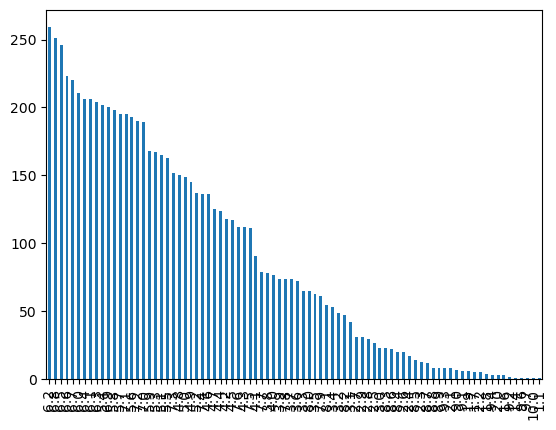

In [36]:
df_final['Rating'].value_counts().plot(kind='bar')

In [17]:
df_final.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
print(df_final['Actor 1'])

1            Rasika Dugal
3                 Prateik
5              Bobby Deol
6         Jimmy Sheirgill
8               Yash Dave
               ...       
15501          Dharmendra
15503         Chiranjeevi
15504    Naseeruddin Shah
15505        Akshay Kumar
15508          Dharmendra
Name: Actor 1, Length: 7558, dtype: object


In [20]:
df_final.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [21]:
# Split genres into separate columns (one-hot encoding)
genres = df_final['Genre'].str.get_dummies(sep=', ')

# Concatenate the new genre columns to the original DataFrame
df_final = pd.concat([df_final, genres], axis=1)

# Drop the original 'Genre' column
df_final.drop('Genre', axis=1, inplace=True)

# Now, df_final contains binary columns for each genre

In [22]:
df_final.head()

,Name,Year,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,#Gadhvi (He thought he was Gandhi),(2019),7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,(2019),4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,...,0,0,0,0,1,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,(1997),4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,0,...,0,1,0,0,0,0,0,0,0,0
6,...Yahaan,(2005),7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,0,...,0,0,0,0,1,0,0,0,1,0
8,?: A Question Mark,(2012),5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
df_final.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)


In [24]:
df_final.drop(['Name', 'Year','Votes'], axis=1, inplace=True)

In [25]:
df_final.head()


,Rating,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,7.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.7,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,7.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8,5.6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [26]:
X= df_final.iloc[ : ,1:]

In [27]:
X.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [28]:
y=df_final["Rating"]

In [29]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7558, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1399,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11637,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4356,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10604,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10917,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1594,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Initialize different models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=2)
random_forest_model = RandomForestRegressor(random_state=2)


# List of models for iteration
models = [linear_model, decision_tree_model, random_forest_model]

for model in models:
    # Model Training
    model.fit(X_train, y_train)

    # Model Evaluation
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    
    # Print model performance
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Score: {r2}')
    print('\n')


Model: LinearRegression
Mean Squared Error: 1.695305673273332
R-squared Score: 0.08502187872866718


Model: DecisionTreeRegressor
Mean Squared Error: 1.7199299722283634
R-squared Score: 0.07173183012522233


Model: RandomForestRegressor
Mean Squared Error: 1.698820563673911
R-squared Score: 0.08312484749359395


